In [1]:
import numpy as np
import statsmodels.api as sm
from scipy.stats import pearsonr as corr
import pandas as pd
import matplotlib.pyplot as plt

## Binary_data1

The 'Signs' variable is a binary response variable, so it can be modeled as a Bernoulli random variable, with probability, say $p$.

Now, we do an exploratory data analysis by calculating the summary statistics and making a scatter plot. Here, a box plot of Signs doesn't make sense because the median is either 0 or 1, which are both maximum and minimum values.


### Exploratory Data Analysis

,Age,Signs
count,8.000000,8.000000
mean,34.000000,0.625000
std,12.142017,0.517549
min,20.000000,0.000000
25%,20.750000,0.000000
50%,38.000000,1.000000
75%,41.250000,1.000000
max,52.000000,1.000000


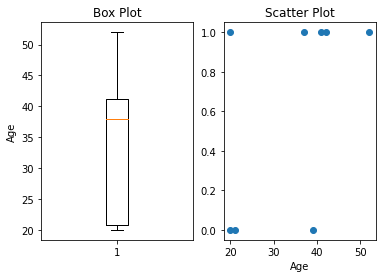

In [2]:
data = pd.read_csv('binary_data1.csv')
data = data.drop(columns=data.columns[0])
data = data.set_index('Subject')
display(data.describe())
data = sm.add_constant(data)
fig, plts = plt.subplots(1, 2)
plts[0].set_title('Box Plot')
plts[0].set_ylabel('Age')
plts[1].set_title('Scatter Plot')
plts[1].set_xlabel('Age')
plts[0].boxplot(data['Age'])
plts[1].scatter(data['Age'], data['Signs'])

We observe that the data ranges from 20 to 52 years of age. The signs of blackout seems to increase with age faster than linear.

So, using the logistic link function, the response variable can be modeled as
$$log(\frac{p}{1-p}) = \beta_{0} + \beta_{1} * Age$$

### GLM Model and Fitting

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Signs   No. Observations:                    8
Model:                            GLM   Df Residuals:                        6
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4.2173
Date:                Thu, 12 May 2022   Deviance:                       8.4345
Time:                        15:09:43   Pearson chi2:                     7.42
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9209      2.647     -1.104      0.270      -8.108       2.266
Age            0.1057      0.080      1.315      0.188      -0.052       0.263
==============================================================================
"""

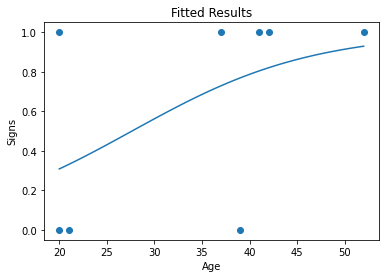

In [3]:
data = sm.add_constant(data)
glm_binom = sm.GLM(data['Signs'], data.drop(columns=['Signs']), family=sm.families.Binomial())
res = glm_binom.fit()
display(res.summary())
xs = np.linspace(np.min(data['Age']), np.max(data['Age']), 100)
ys = res.predict(sm.add_constant(xs))
plt.scatter(data['Age'], data['Signs'])
plt.title('Fitted Results')
plt.xlabel('Age')
plt.ylabel('Signs')
plt.plot(xs, ys)

We observe that the fitted model is
$$log(\frac{p}{1-p}) = -2.92 + 0.107 * Age$$

Both coefficient have low p-values, so we have a high degree of confidence in our model. As $\beta_{1} > 0$, we can say with some confidence that signs of blackout increase with age, and resistance to blackouts decrease with age.

## Binary_data2

In this case too, the data is a binary response variable which takes value 1 if the rain that year exceeds the threshold of 10mm, and 0 otherwise.

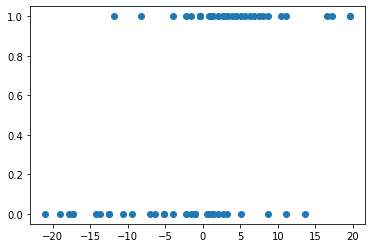

In [4]:
data = pd.read_csv('binary_data2.csv')
data = data.drop(columns=[data.columns[0], 'Exceed'])
plt.scatter(data['SOI'], data['y'])

We observe that proportion of exceed of rain threshold seems to increase faster than linearly, so we use a similar logistic function as the last dataset. Let us assume that the response variable follows a Bernoulli distribution with probability of success $p$.

Then, $$log(\frac{p_{i}}{1-p_{i}}) = \beta_{0} + \beta_{1} * Year_{i} + \beta_{2} * SOI_{i} + \beta_{3} * Phase_{i}$$

In [5]:
data = sm.add_constant(data)
glm_binom = sm.GLM(data['y'], data.drop(columns=['y', 'Rain']), family=sm.families.Binomial())
res = glm_binom.fit()
display(res.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   68
Model:                            GLM   Df Residuals:                       64
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -37.580
Date:                Thu, 12 May 2022   Deviance:                       75.160
Time:                        15:09:44   Pearson chi2:                     68.1
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.2057     28.099     -0.434      0.664     -67.278      42.867
Year           0.0066      0.014      0.457      0.648      -0.022       0.035
SOI            0.1497      0.043      3.514      0.000       0.066       0.233
Phase         -0.1528      0.214     -0.713      0.476      -0.573       0.267
==============================================================================
"""

We observe that p-values for SOI and Phase are quite low, and in fact, the p-value for SOI is close to 0. So we can state with high confidence that probability of rainfall beyond the threshold increases with SOI, as $\beta_{2} > 0$. Also, the proportion of rain threshold decrease with phase, as $\beta_{1} < 0$.

p-value for 'Year' is quite high. So, proportion of exceed of rain threshold likely doesn't depend on time.

## Count_data1

We plot number of noisy miners vs. Euc

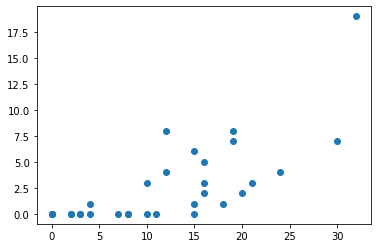

In [6]:
data = pd.read_csv('count_data1.csv')
data = data.drop(columns=data.columns[0])
plt.scatter(data['Euc'], data['noisy_miners'])

We observe that the number of noisy miners seems to increase exponentially with respect to number of eucalyptus trees in a two-hectare block. So, in order to perform GLM, we should use link function $\eta_{i} = log(\lambda_{i})$.

Here, we have assumed that the number of noisy miners follows a Poisson distribution with parameter $\lambda_{i}$.

So, the model is assumed as $$log(\lambda_{i}) = \beta_{0} + \beta_{1} * Euc_{i}$$

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           noisy_miners   No. Observations:                   31
Model:                            GLM   Df Residuals:                       29
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -58.736
Date:                Thu, 12 May 2022   Deviance:                       63.318
Time:                        15:09:44   Pearson chi2:                     67.5
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8762      0.283     -3.098      0.002      -1.431      -0.322
Euc            0.1140      0.012      9.169      0.000       0.090       0.138
==============================================================================
"""

Akaike Information Criteria =  121.4729540354475


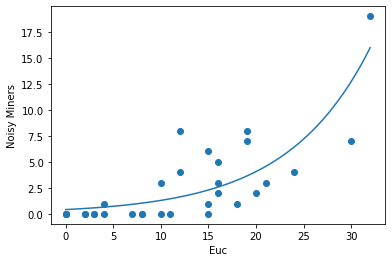

In [7]:
data = sm.add_constant(data)
glm_poisson = sm.GLM(data['noisy_miners'], data.drop(columns='noisy_miners'), family=sm.families.Poisson())
res = glm_poisson.fit()
display(res.summary())
print('Akaike Information Criteria = ', res.aic)
xs = np.linspace(np.min(data['Euc']), np.max(data['Euc']), 100)
ys = res.predict(sm.add_constant(xs))
plt.scatter(data['Euc'], data['noisy_miners'])
plt.xlabel('Euc')
plt.ylabel('Noisy Miners')
plt.plot(xs, ys)

We observe that the p-values are very small. Also, the Akaike Information Criterion value is approximately $121.473$, so we can say that the fit is quite good.

## Survival_data

### Exploratory Data Analysis

,WBC,Time,AG
count,33.000000,33.000000,33.000000
mean,29165.151515,40.878788,1.484848
std,34489.388053,46.703023,0.507519
min,750.000000,1.000000,1.000000
25%,5300.000000,4.000000,1.000000
50%,10500.000000,22.000000,1.000000
75%,32000.000000,65.000000,2.000000
max,100000.000000,156.000000,2.000000


Pearson's r of Time with WBC:  -0.5087889215640556
Pearson's r with of Time with AG:  -0.48393865646034695


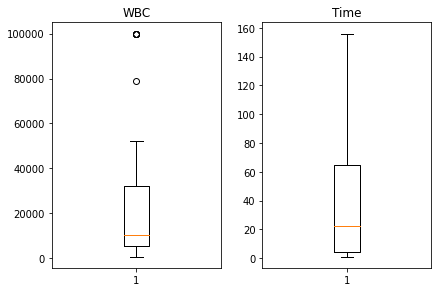

In [8]:
data = pd.read_csv('survival_data.csv')
data = data.drop(columns=data.columns[0])
display(data.describe())
fig, plts = plt.subplots(1, 2)
fig.tight_layout()
plts[0].set_title('WBC')
plts[1].set_title('Time')
plts[0].boxplot(data['WBC'])
plts[1].boxplot(data['Time'])
print('Pearson\'s r of Time with WBC: ', corr(np.log(data['WBC']), data['Time'])[0])
print('Pearson\'s r with of Time with AG: ', corr(data['AG'], data['Time'])[0])

We observe that Pearson's r correlation coefficients of Time with both log(WBC) and AG are quite high, and negative. So, we can say that survival time depends on WBC and AG, as in the lower WBC counts are, the longer the individual is expected to survive. Similarly, if AG factor is 1, the patient is more likely to survive than if AG factor is 2.

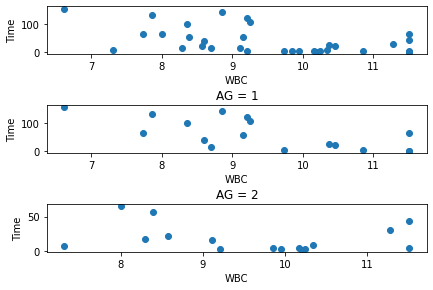

In [9]:
fig, plts = plt.subplots(3, 1)
fig.tight_layout(h_pad=3)
plts[0].set_xlabel('WBC')
plts[0].set_ylabel('Time')
plts[0].scatter(np.log(data['WBC']), data['Time'])
plts[1].set_xlabel('WBC')
plts[1].set_ylabel('Time')
plts[1].set_title('AG = 1')
plts[1].scatter(np.log(data.loc[data['AG']==1]['WBC']), data.loc[data['AG']==1]['Time'])
plts[2].set_xlabel('WBC')
plts[2].set_ylabel('Time')
plts[2].set_title('AG = 2')
plts[2].scatter(np.log(data.loc[data['AG']==2]['WBC']), data.loc[data['AG']==2]['Time'])

We observe that plotting the Time with log(WBC) doesn't give a good scatter plot. However, for AG = 1, we get a reasonably good approximation of a linear model.

### GLM Model and Fitting

So now, we assume that the Survival Times follow an exponential distribution with parameter $\lambda_{i}$. Then, we assume the GLM as $$log(\lambda_{i}) = \beta_{0} + \beta_{1} * WBC_{i} + \beta_{2} * AG_{i}$$

In [10]:
data = sm.add_constant(data)
glm_exp = sm.GLM(data['Time'], data.drop(columns=['Time']), family=sm.families.Gamma(link=sm.families.links.log()))
res = glm_exp.fit()
display(res.summary())
print('Akaike Information Criterion: ', res.aic)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Time   No. Observations:                   33
Model:                            GLM   Df Residuals:                       30
Model Family:                   Gamma   Df Model:                            2
Link Function:                    log   Scale:                          1.0546
Method:                          IRLS   Log-Likelihood:                -148.40
Date:                Thu, 12 May 2022   Deviance:                       44.292
Time:                        15:09:45   Pearson chi2:                     31.6
No. Iterations:                    33                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3518      0.581      9.217      0.000       4.214       6.490
WBC         -6.83e-06   5.26e-06     -1.298      0.194   -1.71e-05    3.49e-06
AG            -1.1125      0.358     -3.110      0.002      -1.814      -0.411
==============================================================================
"""

Akaike Information Criterion:  302.79245332738793


We observe that p-value for WBC is quite high. Also, AIC value is 302.8, which is quite high. So, we have very little confidence in our model and our fitted parameter. However, p-value for AG is low, so Survival Time depends on AG. This is therefore not a good model.

A good guess is that the errors are dependent on AG values, which cannot be fit by a linear model.

### Choice of new model

We use the same GLM, but in this case, we separate the data on the basis of AG factors. We fit the model separately with respect to each AG factor.

In [11]:
glm_exp = sm.GLM(data.loc[data['AG']==1]['Time'], data.loc[data['AG']==1].drop(columns=['Time', 'AG']), family=sm.families.Gamma(link=sm.families.links.log()))
resAG1 = glm_exp.fit()
display(resAG1.summary())
print('Akaike Information Criterion: ', resAG1.aic)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Time   No. Observations:                   17
Model:                            GLM   Df Residuals:                       15
Model Family:                   Gamma   Df Model:                            1
Link Function:                    log   Scale:                          1.0025
Method:                          IRLS   Log-Likelihood:                -84.762
Date:                Thu, 12 May 2022   Deviance:                       21.230
Time:                        15:09:45   Pearson chi2:                     15.0
No. Iterations:                    17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4492      0.314     14.161      0.000       3.833       5.065
WBC        -1.593e-05   6.86e-06     -2.323      0.020   -2.94e-05   -2.49e-06
==============================================================================
"""

Akaike Information Criterion:  173.52403583421074


In [12]:
glm_exp = sm.GLM(data.loc[data['AG']==2]['Time'], data.loc[data['AG']==2].drop(columns=['Time', 'AG']), family=sm.families.Gamma(link=sm.families.links.log()))
resAG2 = glm_exp.fit()
display(resAG2.summary())
print('Akaike Information Criterion: ', resAG2.aic)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Time   No. Observations:                   16
Model:                            GLM   Df Residuals:                       14
Model Family:                   Gamma   Df Model:                            1
Link Function:                    log   Scale:                          1.3778
Method:                          IRLS   Log-Likelihood:                -62.479
Date:                Thu, 12 May 2022   Deviance:                       19.915
Time:                        15:09:45   Pearson chi2:                     19.3
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8792      0.396      7.277      0.000       2.104       3.655
WBC         2.623e-07   9.07e-06      0.029      0.977   -1.75e-05     1.8e-05
==============================================================================
"""

Akaike Information Criterion:  128.95749942333484


We observe that p-value of WBC is low for AG=1, so we can say that Survival Time decreases with WBC. But for AG=2, the p-value is 0.977. So, Survival Time doesn't depend on WBC.